In [9]:
import pandas as pd

import matplotlib.pyplot as plt

from wordcloud import WordCloud

In [10]:
MoviesDataset = pd.read_csv("movies_dataset_final.csv", sep=',')

In [11]:
MoviesDataset.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,release_year,return
count,4.536600e+04,45366.000000,45366.000000,4.536600e+04,45120.000000,45366.000000,45366.000000,45366.000000,4.536600e+04
mean,4.238891e+06,107860.641339,2.930444,1.124022e+07,94.211104,5.625114,110.178900,1991.900366,6.601888e+02
std,1.744483e+07,112021.858608,6.010525,6.439827e+07,38.279063,1.914800,491.792041,24.017288,7.470153e+04
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1874.000000,0.000000e+00
25%,0.000000e+00,26333.250000,0.390529,0.000000e+00,85.000000,5.000000,3.000000,1978.000000,0.000000e+00
50%,0.000000e+00,59753.000000,1.133031,0.000000e+00,95.000000,6.000000,10.000000,2001.000000,0.000000e+00
75%,0.000000e+00,156140.750000,3.704432,0.000000e+00,107.000000,6.800000,34.000000,2010.000000,0.000000e+00
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000,1.239638e+07


In [12]:
MoviesDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45366 entries, 0 to 45365
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             45366 non-null  float64
 1   id                 45366 non-null  int64  
 2   original_language  45355 non-null  object 
 3   overview           44427 non-null  object 
 4   popularity         45366 non-null  float64
 5   release_date       45366 non-null  object 
 6   revenue            45366 non-null  float64
 7   runtime            45120 non-null  float64
 8   status             45287 non-null  object 
 9   tagline            20405 non-null  object 
 10  title              45366 non-null  object 
 11  vote_average       45366 non-null  float64
 12  vote_count         45366 non-null  float64
 13  release_year       45366 non-null  int64  
 14  return             45366 non-null  float64
 15  genre_names        45366 non-null  object 
 16  collection_name    453

<Axes: xlabel='budget', ylabel='revenue'>

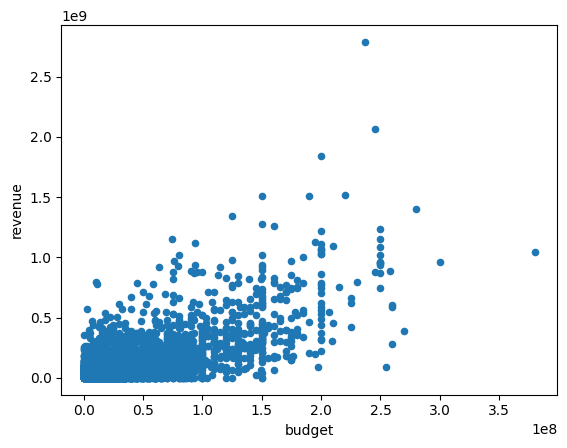

In [13]:
#Para ver la relación entre presupuesto e ingresos:

MoviesDataset.plot.scatter(x='budget', y='revenue')

In [14]:
#Para ver los máximos de las variables budget, revenue y return:

BudgetMax = MoviesDataset.budget.idxmax()

RevenueMax = MoviesDataset.revenue.idxmax()

ReturnMax = MoviesDataset["return"].idxmax()

In [15]:
#Máximo de budget:
MoviesDataset.loc[BudgetMax]

budget                                                     380000000.0
id                                                                1865
original_language                                                   en
overview             Captain Jack Sparrow crosses paths with a woma...
popularity                                                    27.88772
release_date                                                2011-05-14
revenue                                                   1045713802.0
runtime                                                          136.0
status                                                        Released
tagline                                    Live Forever Or Die Trying.
title                      Pirates of the Caribbean: On Stranger Tides
vote_average                                                       6.4
vote_count                                                      5068.0
release_year                                                      2011
return

In [16]:
#Máximo de revenue:
MoviesDataset.loc[RevenueMax]

budget                                                     237000000.0
id                                                               19995
original_language                                                   en
overview             In the 22nd century, a paraplegic Marine is di...
popularity                                                  185.070892
release_date                                                2009-12-10
revenue                                                   2787965087.0
runtime                                                          162.0
status                                                        Released
tagline                                    Enter the World of Pandora.
title                                                           Avatar
vote_average                                                       7.2
vote_count                                                     12114.0
release_year                                                      2009
return

In [17]:
#Máximo de return, podemos ver que es un outliar ya que el budget estaba arbitrariamente establecido en 1:
MoviesDataset.loc[ReturnMax]

budget                                                             1.0
id                                                               13703
original_language                                                   en
overview             A college freshman returns to Los Angeles for ...
popularity                                                    4.028679
release_date                                                1987-11-06
revenue                                                     12396383.0
runtime                                                           98.0
status                                                        Released
tagline              In Beverly Hills, you can have anything your h...
title                                                   Less Than Zero
vote_average                                                       6.1
vote_count                                                        77.0
release_year                                                      1987
return

{'whiskers': [<matplotlib.lines.Line2D at 0x2798eafd710>,
 'caps': [<matplotlib.lines.Line2D at 0x2798eb17890>,
 'boxes': [<matplotlib.lines.Line2D at 0x2798c9fbe10>],
 'medians': [<matplotlib.lines.Line2D at 0x2798eb24c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x2798e8f7410>],
 'means': []}

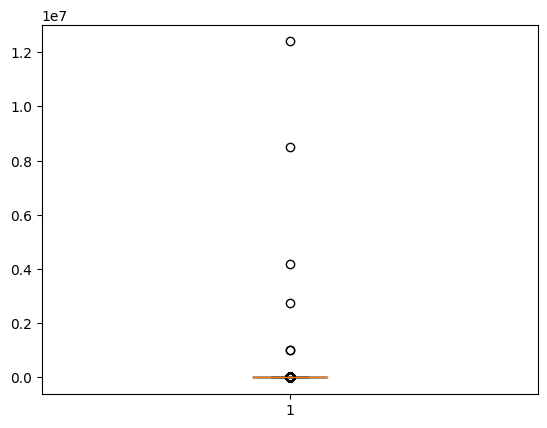

In [18]:
#Para ver return en un diagrama de cajas, vemos que hay valores muy por fuera de la media:

plt.boxplot(MoviesDataset['return'])

<Axes: xlabel='budget', ylabel='return'>

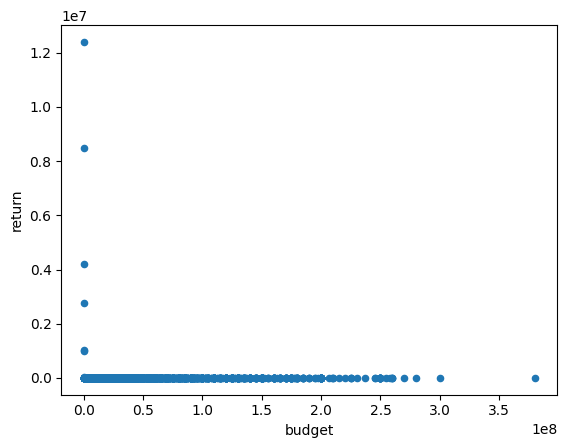

In [19]:
#Para ver la relación entre presupuesto y retorno, vemos que hay valores atípicos en la variable return,
#Podemos notar que los valores atípicos en la variable return se dan por valores de budget muy bajos:

MoviesDataset.plot.scatter(x='budget', y='return')

<Axes: xlabel='budget', ylabel='popularity'>

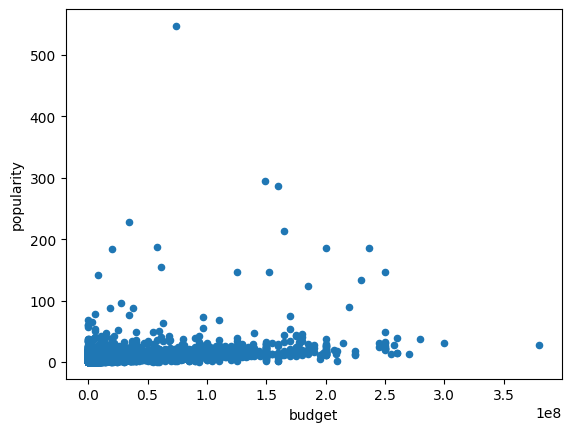

In [20]:
#Para ver relación entre budget y popularity:

MoviesDataset.plot.scatter(x='budget', y='popularity')

<Axes: xlabel='vote_average', ylabel='popularity'>

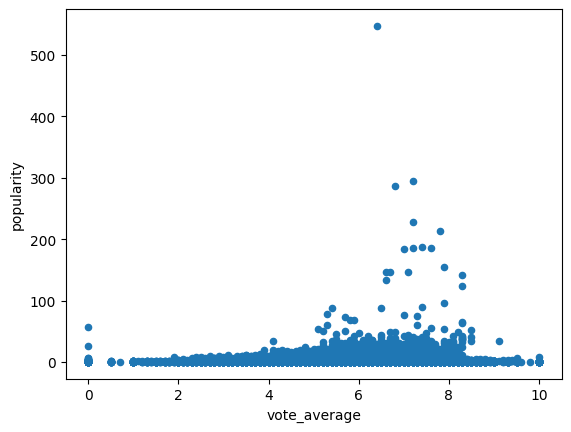

In [21]:
#Para ver la relación entre vote_average y popularity:

MoviesDataset.plot.scatter(x='vote_average', y='popularity')

In [22]:
#Para ver el valor máximo de popularity:

PopularityMax = MoviesDataset["popularity"].idxmax()

MoviesDataset.loc[PopularityMax]

budget                                                      74000000.0
id                                                              211672
original_language                                                   en
overview             Minions Stuart, Kevin and Bob are recruited by...
popularity                                                  547.488298
release_date                                                2015-06-17
revenue                                                   1156730962.0
runtime                                                           91.0
status                                                        Released
tagline                   Before Gru, they had a history of bad bosses
title                                                          Minions
vote_average                                                       6.4
vote_count                                                      4729.0
release_year                                                      2015
return

<Axes: xlabel='release_year', ylabel='revenue'>

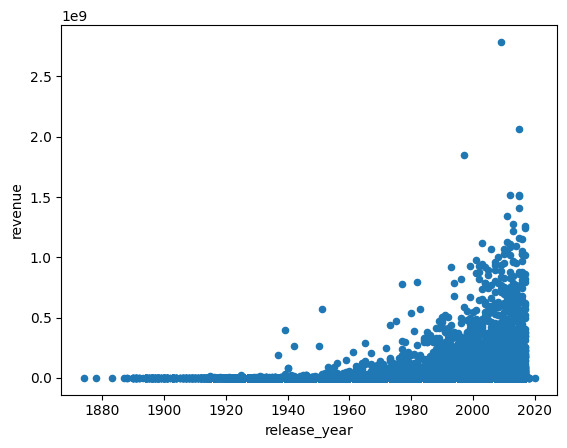

In [23]:
#Para ver la relación entre el año de estreno y los ingresos,
#vemos que la industria del cine aumentó sus ingresos considerablemente a través de los años:

MoviesDataset.plot.scatter(x='release_year', y='revenue')

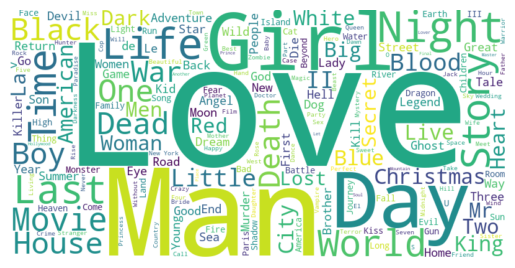

In [24]:
#Para generar una nube de las palabras más utilizadas en los títulos:

Titulos = MoviesDataset["title"].str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(Titulos)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()

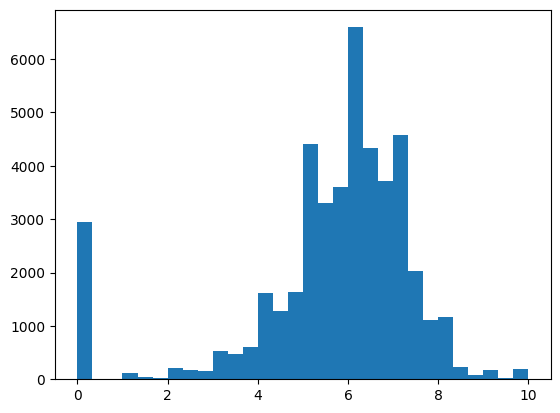

In [25]:
#Para ver un histograma de frecuencias de los votos promedio de las películas:
plt.hist(MoviesDataset["vote_average"], bins=30)

plt.show()

In [26]:
#Para ver que cantidad de películas hay en cada idioma, podemos ver que el inglés es, por mucho, el lenguaje más común,
#seguido por el francés y el italiano:

from collections import Counter

lenguajes = MoviesDataset["original_language"]

frecuencias = Counter(lenguajes)

frecuencias_ordenadas = frecuencias.most_common()

for lenguaje, frecuencia in frecuencias_ordenadas:
    print(f"Lenguaje: {lenguaje}, Frecuencia: {frecuencia}")

Lenguaje: en, Frecuencia: 32202
Lenguaje: fr, Frecuencia: 2434
Lenguaje: it, Frecuencia: 1527
Lenguaje: ja, Frecuencia: 1355
Lenguaje: de, Frecuencia: 1079
Lenguaje: es, Frecuencia: 991
Lenguaje: ru, Frecuencia: 805
Lenguaje: hi, Frecuencia: 507
Lenguaje: ko, Frecuencia: 444
Lenguaje: zh, Frecuencia: 405
Lenguaje: sv, Frecuencia: 386
Lenguaje: pt, Frecuencia: 315
Lenguaje: cn, Frecuencia: 313
Lenguaje: fi, Frecuencia: 300
Lenguaje: nl, Frecuencia: 246
Lenguaje: da, Frecuencia: 227
Lenguaje: pl, Frecuencia: 218
Lenguaje: tr, Frecuencia: 150
Lenguaje: cs, Frecuencia: 129
Lenguaje: el, Frecuencia: 113
Lenguaje: no, Frecuencia: 106
Lenguaje: fa, Frecuencia: 101
Lenguaje: hu, Frecuencia: 100
Lenguaje: th, Frecuencia: 78
Lenguaje: ta, Frecuencia: 78
Lenguaje: he, Frecuencia: 67
Lenguaje: sr, Frecuencia: 63
Lenguaje: ro, Frecuencia: 57
Lenguaje: te, Frecuencia: 45
Lenguaje: ar, Frecuencia: 39
Lenguaje: ml, Frecuencia: 36
Lenguaje: xx, Frecuencia: 34
Lenguaje: bn, Frecuencia: 29
Lenguaje: hr, 

In [27]:
#Para ver la frecuencia de cada compania, vemos que hay muchos valores faltantes en los datos de las companias:

companias = MoviesDataset["companies_names"]

frecuencias = Counter(companias)

frecuencias_ordenadas = frecuencias.most_common()

for companias, frecuencia in frecuencias_ordenadas:
    print(f"Lenguaje: {companias}, Frecuencia: {frecuencia}")

Lenguaje: [], Frecuencia: 11842
Lenguaje: ['Metro-Goldwyn-Mayer (MGM)'], Frecuencia: 741
Lenguaje: ['Warner Bros.'], Frecuencia: 541
Lenguaje: ['Paramount Pictures'], Frecuencia: 506
Lenguaje: ['Twentieth Century Fox Film Corporation'], Frecuencia: 438
Lenguaje: ['Universal Pictures'], Frecuencia: 319
Lenguaje: ['RKO Radio Pictures'], Frecuencia: 247
Lenguaje: ['Columbia Pictures Corporation'], Frecuencia: 207
Lenguaje: ['Columbia Pictures'], Frecuencia: 148
Lenguaje: ['Mosfilm'], Frecuencia: 144
Lenguaje: ['Walt Disney Pictures'], Frecuencia: 85
Lenguaje: ['Universal International Pictures (UI)'], Frecuencia: 82
Lenguaje: ['New Line Cinema'], Frecuencia: 75
Lenguaje: ['Walt Disney Productions'], Frecuencia: 75
Lenguaje: ['Touchstone Pictures'], Frecuencia: 70
Lenguaje: ['Shaw Brothers'], Frecuencia: 69
Lenguaje: ['Toho Company'], Frecuencia: 65
Lenguaje: ['TriStar Pictures'], Frecuencia: 62
Lenguaje: ['Orion Pictures'], Frecuencia: 61
Lenguaje: ['Hammer Film Productions'], Frecuencia:

In [28]:
#Para ver la frecuencia de los países productores de películas, vemos que la mayoría de las películas se filman en USA:

countries = MoviesDataset["countries_names"]

frecuencias = Counter(countries)

frecuencias_ordenadas = frecuencias.most_common()

for countries, frecuencia in frecuencias_ordenadas:
    print(f"Lenguaje: {countries}, Frecuencia: {frecuencia}")

Lenguaje: ['United States of America'], Frecuencia: 17839
Lenguaje: [], Frecuencia: 6275
Lenguaje: ['United Kingdom'], Frecuencia: 2226
Lenguaje: ['France'], Frecuencia: 1642
Lenguaje: ['Japan'], Frecuencia: 1357
Lenguaje: ['Italy'], Frecuencia: 1030
Lenguaje: ['Canada'], Frecuencia: 837
Lenguaje: ['Germany'], Frecuencia: 749
Lenguaje: ['India'], Frecuencia: 734
Lenguaje: ['Russia'], Frecuencia: 717
Lenguaje: ['United Kingdom', 'United States of America'], Frecuencia: 569
Lenguaje: ['South Korea'], Frecuencia: 435
Lenguaje: ['Spain'], Frecuencia: 399
Lenguaje: ['Hong Kong'], Frecuencia: 364
Lenguaje: ['Canada', 'United States of America'], Frecuencia: 364
Lenguaje: ['Australia'], Frecuencia: 335
Lenguaje: ['Sweden'], Frecuencia: 332
Lenguaje: ['Finland'], Frecuencia: 270
Lenguaje: ['France', 'Italy'], Frecuencia: 235
Lenguaje: ['Germany', 'United States of America'], Frecuencia: 215
Lenguaje: ['Brazil'], Frecuencia: 208
Lenguaje: ['Poland'], Frecuencia: 199
Lenguaje: ['Denmark'], Frecu